In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.4
nruns = 10
ouput_name = 'XGBRegressor_diabetes_rate04'  

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = diabetes.feature_names)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = diabetes.feature_names)
    
    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    scaler_y = StandardScaler()
    scaler_y.fit(y_train)
    y_train = pd.DataFrame(scaler_y.transform(y_train))
    y_test = pd.DataFrame(scaler_y.transform(y_test))
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test
chosen_model = xgboost.XGBRegressor(n_estimators=100, max_depth=2)


Instructions for updating:
non-resource variables are not supported in the long term


# Generate missing data, impute, and use SHAP to explain

In [2]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model))

iteration: 0


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.51it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.45it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.39it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.58it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.67it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.24it/s]


Validation result: best alpha 0.1, best score 0.7567485162456753, scores {0.0: 2.007351349937301, 0.01: 5.861306439323589, 0.1: 0.7567485162456753, 1.0: 0.8136615544082185, 10.0: 0.9419492922263889, 100.0: 0.9891996663837953}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69.97it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.11it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.45it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.19it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.49it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.03it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.29it/s]


Validation result: best alpha 0.1, best score 0.7567485162456753, scores {0.0: 2.007351349937301, 0.01: 5.861306439323589, 0.1: 0.7567485162456753, 1.0: 0.8136615544082185, 10.0: 0.9419492922263889, 100.0: 0.9891996663837953}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 230.36it/s]


loss 0.19738726992308955
loss 0.07109314769907249
loss 0.056023238524720055
loss 0.054342820440184895
loss 0.05569902010296431
loss 0.05648816144117922
loss 0.060412777751015105
loss 0.06507169813979098
loss 0.06280090158868645
loss 0.06274543451343383
number of runs used by missForest: 10
loss: 0.06274543451343383
loss 0.20507077891928313
loss 0.06570665141149573
loss 0.05440845023791165
loss 0.05194711806148784
loss 0.05428153918783733
loss 0.05582983398355375
loss 0.056592715655064865
loss 0.06072571699599848
loss 0.05974565695626706
loss 0.06165170680566238
number of runs used by missForest: 10
loss: 0.06165170680566238



100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 613.34it/s]


iteration: 1


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.07it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.08it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.19it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.56it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.82it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.68it/s]


Validation result: best alpha 0.1, best score 0.750321448594261, scores {0.0: 1.0551168839634224, 0.01: 1.6250659910606045, 0.1: 0.750321448594261, 1.0: 0.810331061206199, 10.0: 0.9439142788575758, 100.0: 0.9968253304297547}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 61.97it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.99it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.64it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.20it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.62it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.52it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.83it/s]


Validation result: best alpha 0.1, best score 0.750321448594261, scores {0.0: 1.0551168839634224, 0.01: 1.6250659910606045, 0.1: 0.750321448594261, 1.0: 0.810331061206199, 10.0: 0.9439142788575758, 100.0: 0.9968253304297547}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 276.54it/s]


loss 0.20751340104784616
loss 0.0707503182288878
loss 0.054750189430860914
loss 0.05301541841308868
loss 0.053273025920938716
loss 0.055134405539703606
loss 0.055949222450632455
loss 0.056144906396044615
loss 0.05608568250943225
loss 0.057090030617771834
number of runs used by missForest: 10
loss: 0.057090030617771834
loss 0.20771717037773885
loss 0.06339889259653708
loss 0.04660617049827795
loss 0.04605256733682054
loss 0.048515104813521705
loss 0.04698872425978525
loss 0.04620138349298989
loss 0.048843917181655136
loss 0.050673290765012695
loss 0.04983565130669963
number of runs used by missForest: 10
loss: 0.04983565130669963


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 660.65it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 2


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.38it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.25it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.70it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.52it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.62it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.46it/s]


Validation result: best alpha 0.1, best score 0.750802684012993, scores {0.0: 0.7823798916477712, 0.01: 0.7680943870638394, 0.1: 0.750802684012993, 1.0: 0.7992629309664991, 10.0: 0.9224381260704189, 100.0: 0.9705127533742168}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 54.02it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.63it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.50it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.32it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.65it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.32it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.69it/s]


Validation result: best alpha 0.1, best score 0.750802684012993, scores {0.0: 0.7823798916477712, 0.01: 0.7680943870638394, 0.1: 0.750802684012993, 1.0: 0.7992629309664991, 10.0: 0.9224381260704189, 100.0: 0.9705127533742168}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 206.66it/s]


loss 0.19621068561113533
loss 0.08202389279251586
loss 0.06615490734555082
loss 0.060264308337917245
loss 0.05956933956554602
loss 0.06222282804210082
loss 0.061851343868105736
loss 0.061588825953462635
loss 0.05633992810165431
loss 0.055383433729916214
number of runs used by missForest: 10
loss: 0.055383433729916214
loss 0.21379125591183018
loss 0.07434704602501403
loss 0.06188139517957654
loss 0.05785749384555635
loss 0.05718452075113533
loss 0.055535240708191866
loss 0.05762945256699633
loss 0.061859691622354655
loss 0.061307635607179695
loss 0.06125073019940029
number of runs used by missForest: 10
loss: 0.06125073019940029


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 626.40it/s]
C:\Users\thung\.conda\envs\mtime\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


iteration: 3


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.66it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.10it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.03it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.54it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.93it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.63it/s]


Validation result: best alpha 0.1, best score 0.7566242539117586, scores {0.0: 0.7669720342565612, 0.01: 0.7581578548453288, 0.1: 0.7566242539117586, 1.0: 0.81577417804796, 10.0: 0.9456212572171429, 100.0: 0.9970928811529934}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 64.25it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.67it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.74it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.28it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.47it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.14it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.93it/s]


Validation result: best alpha 0.1, best score 0.7566242539117586, scores {0.0: 0.7669720342565612, 0.01: 0.7581578548453289, 0.1: 0.7566242539117586, 1.0: 0.81577417804796, 10.0: 0.9456212572171429, 100.0: 0.9970928811529934}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 242.82it/s]


loss 0.21634231985081076
loss 0.07104260997651345
loss 0.0494862453401655
loss 0.04835842542188526
loss 0.05449360961988047
loss 0.057070687675863686
loss 0.06237405965776169
loss 0.06814317947023378
loss 0.06972574595236716
loss 0.07191436417518811
number of runs used by missForest: 10
loss: 0.07191436417518811
loss 0.21532368045597436
loss 0.07701693479833889
loss 0.0528216867950809
loss 0.04954845865877111
loss 0.04860412226464556
loss 0.05161260679266222
loss 0.05299847497760437
loss 0.05453255662653899
loss 0.05528134217151602
loss 0.05927905459595343
number of runs used by missForest: 10
loss: 0.05927905459595343


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 633.11it/s]


iteration: 4


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.82it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.85it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.65it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.88it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.27it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.08it/s]


Validation result: best alpha 0.1, best score 0.7510301939561453, scores {0.0: 0.800480136550133, 0.01: 0.7629976948625143, 0.1: 0.7510301939561453, 1.0: 0.8148644696611184, 10.0: 0.9497991605080005, 100.0: 1.002104325463474}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 68.27it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.42it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.00it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.54it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.30it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.86it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.29it/s]


Validation result: best alpha 0.1, best score 0.7510301939561453, scores {0.0: 0.8004801365501328, 0.01: 0.7629976948625142, 0.1: 0.7510301939561453, 1.0: 0.8148644696611184, 10.0: 0.9497991605080004, 100.0: 1.0021043254634743}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 221.77it/s]


loss 0.21081624117075723
loss 0.06572271657582135
loss 0.052131144952304316
loss 0.05136043407044826
loss 0.04937456092053876
loss 0.051414597620313654
loss 0.05573397494750031
loss 0.061348430028921
loss 0.062492624230637145
loss 0.06427557467644275
number of runs used by missForest: 10
loss: 0.06427557467644275
loss 0.19950346201715766
loss 0.06883526596239424
loss 0.05230669816073205
loss 0.05002456656786271
loss 0.04985345126088327
loss 0.054950646885847665
loss 0.056318220824385895
loss 0.05592948641091456
loss 0.057719821507874074
loss 0.06092775368558156
number of runs used by missForest: 10
loss: 0.06092775368558156


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 631.07it/s]


iteration: 5


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.02it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.95it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.60it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.95it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.00it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.54it/s]


Validation result: best alpha 0.01, best score 0.7429088677126082, scores {0.0: 0.7443301214679505, 0.01: 0.7429088677126082, 0.1: 0.7458753790950791, 1.0: 0.8040171106938724, 10.0: 0.9347816699104345, 100.0: 0.9847174927572006}
Value alpha used in for transforming is: 0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 66.39it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.39it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.79it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.65it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.14it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.83it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.21it/s]


Validation result: best alpha 0.01, best score 0.7429088677126082, scores {0.0: 0.7443301214679505, 0.01: 0.7429088677126082, 0.1: 0.7458753790950792, 1.0: 0.8040171106938724, 10.0: 0.9347816699104345, 100.0: 0.9847174927572006}
Value alpha used in for transforming is: 0.01


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 215.77it/s]


loss 0.20096087292033749
loss 0.06921592407379981
loss 0.05753558151858733
loss 0.05383403627800912
loss 0.055550684465305776
loss 0.05522779316506515
loss 0.05650173261160356
loss 0.05810281800547357
loss 0.06057862442349475
loss 0.06013804259879271
number of runs used by missForest: 10
loss: 0.06013804259879271
loss 0.20442784970285088
loss 0.07016941682773868
loss 0.058438211793686336
loss 0.054847937843439304
loss 0.05535281920931436
loss 0.05715708587461077
loss 0.06152394921996506
loss 0.06246884242111801
loss 0.06148131440394072
loss 0.06050114315467227
number of runs used by missForest: 10
loss: 0.06050114315467227


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 613.99it/s]


iteration: 6


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.59it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.75it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.89it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.19it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.57it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.62it/s]


Validation result: best alpha 0.1, best score 0.718521657223258, scores {0.0: 0.7378950984270057, 0.01: 0.7675689779599318, 0.1: 0.718521657223258, 1.0: 0.7912219515687696, 10.0: 0.9321553394990718, 100.0: 0.9872303756791456}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 66.57it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.29it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.43it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.52it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.65it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.08it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.63it/s]


Validation result: best alpha 0.1, best score 0.718521657223258, scores {0.0: 0.7378950984270057, 0.01: 0.7675689779599318, 0.1: 0.718521657223258, 1.0: 0.7912219515687696, 10.0: 0.9321553394990718, 100.0: 0.9872303756791456}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 236.46it/s]


loss 0.21963230512362772
loss 0.0655318467661383
loss 0.04777462318546461
loss 0.042293987337148564
loss 0.04185347586902839
loss 0.046643664657948274
loss 0.04827708035299378
loss 0.046576864375323164
loss 0.04618251866458454
loss 0.04771472943815995
number of runs used by missForest: 10
loss: 0.04771472943815995
loss 0.22298584861445117
loss 0.06267935534978158
loss 0.04828947428034808
loss 0.04401073251594296
loss 0.04496642677646813
loss 0.046894782627934645
loss 0.04890100830355597
loss 0.049992593142059435
loss 0.05148468650075301
loss 0.05474148467404877
number of runs used by missForest: 10
loss: 0.05474148467404877


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 597.17it/s]


iteration: 7


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.70it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.46it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.21it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.09it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.46it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.03it/s]


Validation result: best alpha 0.1, best score 0.7644161423972755, scores {0.0: 1.1068845188606677, 0.01: 3.8345941941502946, 0.1: 0.7644161423972755, 1.0: 0.8165798899350694, 10.0: 0.9522891680999908, 100.0: 1.006540086156196}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 54.40it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.54it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.42it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.11it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.90it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.42it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.00it/s]


Validation result: best alpha 0.1, best score 0.7644161423972756, scores {0.0: 1.1068845188606677, 0.01: 3.8345941941502946, 0.1: 0.7644161423972756, 1.0: 0.8165798899350694, 10.0: 0.9522891680999908, 100.0: 1.006540086156196}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 242.25it/s]


loss 0.21326810688824552
loss 0.06971137654551328
loss 0.05785425744978136
loss 0.05501800741760171
loss 0.05556192167139672
loss 0.05489096198072823
loss 0.05677011256939645
loss 0.05777151230613868
loss 0.06270173056095335
loss 0.06594053775982843
number of runs used by missForest: 10
loss: 0.06594053775982843
loss 0.21308740819190397
loss 0.06555192220380383
loss 0.05447617188995557
loss 0.049559726272326673
loss 0.04951584104097059
loss 0.046776925826150256
loss 0.04839992486725835
loss 0.05027106071635446
loss 0.0505007138014746
loss 0.05077467727760233
number of runs used by missForest: 10
loss: 0.05077467727760233


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 652.80it/s]


iteration: 8


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.55it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.78it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.16it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.11it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.91it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.15it/s]


Validation result: best alpha 0.1, best score 0.7607579892494343, scores {0.0: 0.7635603677356497, 0.01: 0.7617969910950237, 0.1: 0.7607579892494343, 1.0: 0.8132375979104035, 10.0: 0.9381228609822961, 100.0: 0.9860027735466607}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 60.08it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.53it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.01it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.79it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.19it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.17it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.35it/s]


Validation result: best alpha 0.1, best score 0.7607579892494344, scores {0.0: 0.7635603677356497, 0.01: 0.7617969910950237, 0.1: 0.7607579892494344, 1.0: 0.8132375979104035, 10.0: 0.9381228609822961, 100.0: 0.9860027735466607}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 220.21it/s]


loss 0.20095217803262325
loss 0.07416667390101597
loss 0.05631552348554714
loss 0.05062132559417039
loss 0.05302673109549765
loss 0.05488972182832404
loss 0.055526413722482945
loss 0.05578419833062542
loss 0.056311414442994444
loss 0.06114066101654409
number of runs used by missForest: 10
loss: 0.06114066101654409
loss 0.20322772849176052
loss 0.06979466729197284
loss 0.06031708236316412
loss 0.05430590543010727
loss 0.054832879789702145
loss 0.05306873471911571
loss 0.053471230132147336
loss 0.05460465426378071
loss 0.05616601425187673
loss 0.05712437088039817
number of runs used by missForest: 10
loss: 0.05712437088039817


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 601.35it/s]


iteration: 9


C:\Users\thung\.conda\envs\mtime\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.76it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.74it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.35it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.51it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.44it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.45it/s]


Validation result: best alpha 0.1, best score 0.7522302367084888, scores {0.0: 0.9051857376170511, 0.01: 0.7594567473230953, 0.1: 0.7522302367084888, 1.0: 0.8101576832538644, 10.0: 0.9396503238803056, 100.0: 0.9896227414097548}
Value alpha used in for transforming is: 0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 69.83it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.64it/s]


Running Cross Validation, alpha=0.01


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.25it/s]


Running Cross Validation, alpha=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.49it/s]


Running Cross Validation, alpha=1.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.69it/s]


Running Cross Validation, alpha=10.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.55it/s]


Running Cross Validation, alpha=100.0


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.59it/s]


Validation result: best alpha 0.1, best score 0.7522302367084889, scores {0.0: 0.9051857376170512, 0.01: 0.7594567473230953, 0.1: 0.7522302367084889, 1.0: 0.8101576832538643, 10.0: 0.9396503238803057, 100.0: 0.9896227414097549}
Value alpha used in for transforming is: 0.1


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 283.01it/s]


loss 0.20824011297896106
loss 0.07206314245449028
loss 0.06318051547103688
loss 0.06279839983467086
loss 0.063283358985434
loss 0.0664210650397983
loss 0.06423293650586225
loss 0.06431925323852351
loss 0.06610927483685966
loss 0.06626269783109603
number of runs used by missForest: 10
loss: 0.06626269783109603
loss 0.21054342531166187
loss 0.07507207624523521
loss 0.05675554042404361
loss 0.05296769136855856
loss 0.059368123463740055
loss 0.06362847452470474
loss 0.06569975659908425
loss 0.0672449133682818
loss 0.06714957778209983
loss 0.06563312524779805
number of runs used by missForest: 10
loss: 0.06563312524779805


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 635.90it/s]


So, the first layer of results is the result of each run. Then, for the sub-level:
- level 0: shape_values_ori, shap_values_xm...
- level 1:  other_measures = [mse_imputation_all, mse_shap_all, mse_ypred_all, cor_ypred_all, spearman_ypred]

In [3]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [4]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [5]:
ranking_res = shap_ranking_table(X_train, shap_values_ori,shap_values_xm, shap_values_mi, shap_values_mice,
                   shap_values_dimv, shap_values_mf, shap_values_soft, shap_values_gain)

combined_feature_importance
\begin{tabular}{lrrrrrrrr}
\toprule
 & Original & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\
Ranking &  &  &  &  &  &  &  &  \\
\midrule
s5 & 0.103 & 0.167 & 0.071 & 0.095 & 0.098 & 0.087 & 0.101 & 0.077 \\
bmi & 0.068 & 0.432 & 0.060 & 0.063 & 0.066 & 0.061 & 0.064 & 0.064 \\
bp & 0.051 & 0.337 & 0.052 & 0.045 & 0.047 & 0.050 & 0.046 & 0.056 \\
s6 & 0.034 & 0.099 & 0.036 & 0.026 & 0.032 & 0.040 & 0.033 & 0.034 \\
age & 0.033 & 0.125 & 0.029 & 0.031 & 0.031 & 0.029 & 0.029 & 0.035 \\
s3 & 0.033 & 0.039 & 0.049 & 0.043 & 0.034 & 0.041 & 0.045 & 0.039 \\
sex & 0.030 & 0.040 & 0.022 & 0.029 & 0.034 & 0.030 & 0.037 & 0.015 \\
s2 & 0.025 & 0.092 & 0.040 & 0.032 & 0.036 & 0.036 & 0.038 & 0.037 \\
s1 & 0.025 & 0.040 & 0.027 & 0.025 & 0.031 & 0.037 & 0.030 & 0.026 \\
s4 & 0.014 & 0.033 & 0.030 & 0.025 & 0.033 & 0.032 & 0.033 & 0.031 \\
\bottomrule
\end{tabular}



In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

    j = 3
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data")
    print(spearman_ypred.round(3))

    j = 4
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    spearman_ypred = mse_ypred_now/nruns 
    print("the ranking correlation for spearman rank correlation between imputed features")
    print(spearman_ypred.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.392 0.322 0.232 0.28  0.255 0.457]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.125 0.029 0.028 0.027 0.03  0.028 0.033]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.309 0.298 0.332 0.275 0.32  0.304 0.358]
the ranking correlation for spearman rank correlation between the predicted y on test set of original data and y predicted on imputed data
[[0.73  0.   ]
 [0.737 0.   ]
 [0.708 0.   ]
 [0.76  0.   ]
 [0.727 0.   ]
 [0.741 0.   ]
 [0.671 0.   ]]
the ranking correlation for spearman rank correlation between imputed features
[[0.42  0.485 0.355 0.367 0.416 0.356 0.555 0.257 0.602 0.428]
 [0.387 0.521 0.671 0.553 0.151 0.125 0.543 0.316 0.728 0.381]
 [0.23  0.525 0.629 0.404 0.157 0.224 0.522 0.185 0.799 0.244]
 [0.235 0.55  0.686 0.

In [7]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'Spearman statistic': spearman_ypred[:,0]}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE,Spearman statistic
Xgb on missing data,0.000000,0.419653
Mean Imputation,0.392175,0.387494
MICE,0.322015,0.229546
DIMV,0.231933,0.234998
missForest,0.279748,0.253572
SOFT-IMPUTE,0.254713,0.325111
GAIN,0.456882,0.270900


imputation MSE versus Spearman statistic


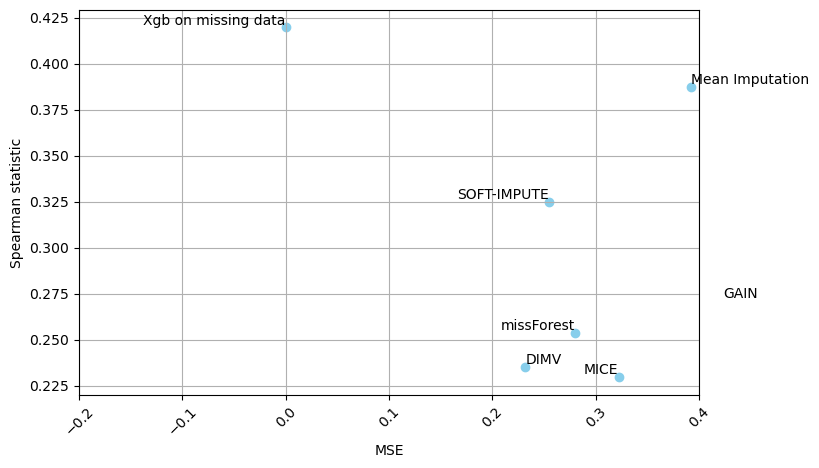

In [8]:
print('imputation MSE versus Spearman statistic')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'], dfplot['Spearman statistic'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'Mean Imputation') or (row.name == 'DIMV'):
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='left', va='bottom')
    else:
        plt.text(row['MSE'],row['Spearman statistic'], row.name, ha='right', va='bottom') 
plt.ylabel('Spearman statistic')
plt.xlabel('MSE')
plt.xlim(-.2, 0.4)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_spearman'+'.png',bbox_inches='tight')
plt.show()

In [9]:
dfplot = pd.DataFrame({'MSE on y test':mse_ypred_all, 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE on y test,MSE Shap
Xgb on missing data,0.308930,0.124836
Mean Imputation,0.297907,0.029223
MICE,0.331583,0.027769
DIMV,0.274724,0.026866
missForest,0.319594,0.030464
SOFT-IMPUTE,0.304006,0.027941
GAIN,0.357808,0.033474


imputation MSE versus Shapley MSE


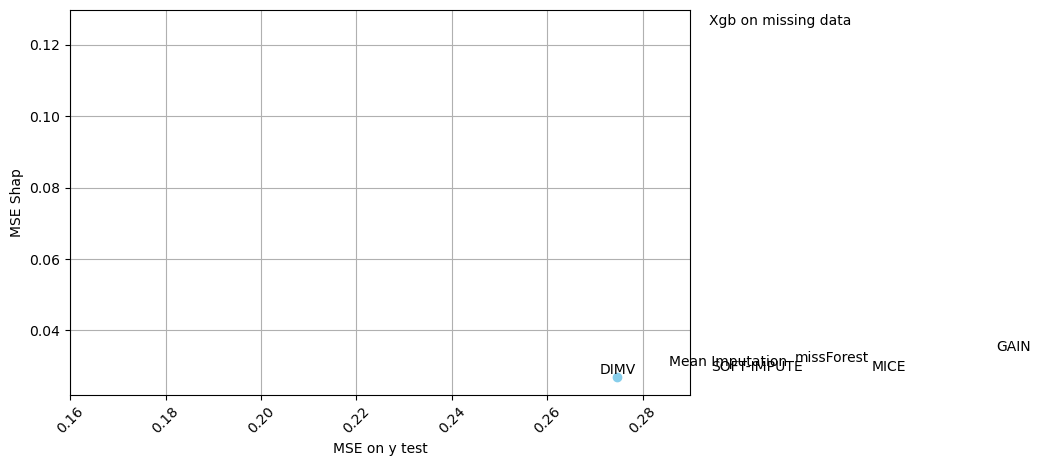

In [10]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on y test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on y test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on y test')
plt.xlim(0.16, 0.29)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

In [11]:
dfplot = pd.DataFrame({'MSE':np.hstack((0,mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = dfplot.index)
dfplot

,MSE,MSE Shap
Xgb on missing data,0.000000,0.124836
Mean Imputation,0.392175,0.029223
MICE,0.322015,0.027769
DIMV,0.231933,0.026866
missForest,0.279748,0.030464
SOFT-IMPUTE,0.254713,0.027941
GAIN,0.456882,0.033474


imputation MSE versus Shapley MSE


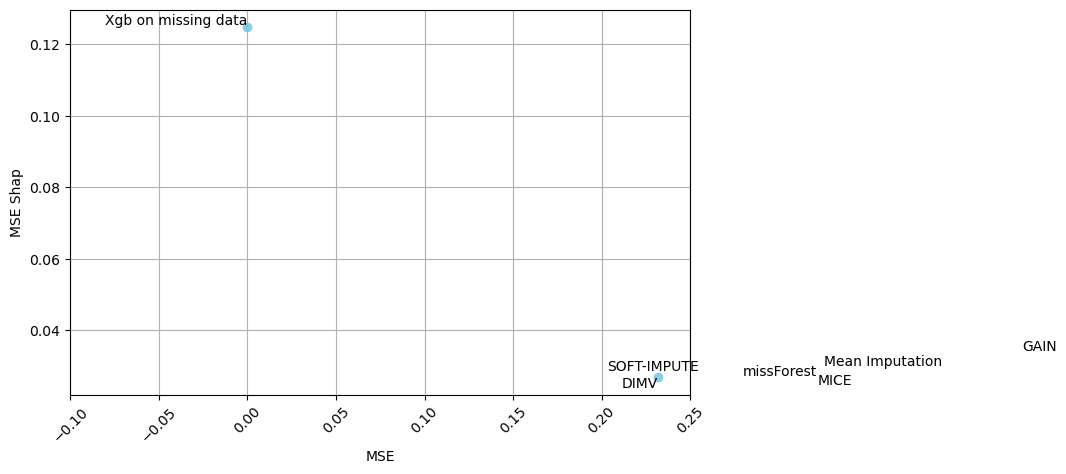

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    if (row.name == 'missForest') or (row.name == 'MICE'):
        plt.text(row['MSE'],row['MSE Shap'], row.name, ha='left', va='top')
    else:
        if  (row.name == 'DIMV'):
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='top')
        else:
            plt.text(row['MSE'],row['MSE Shap'], row.name, ha='right', va='bottom')     
plt.ylabel('MSE Shap')
plt.xlabel('MSE')
plt.xlim(-0.1, 0.25)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

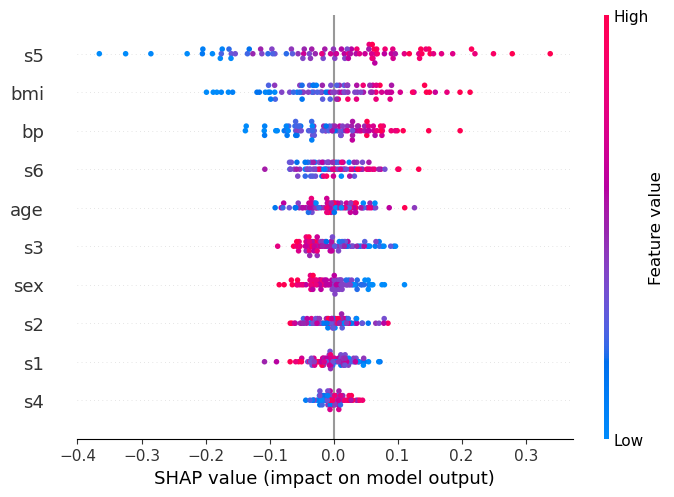

In [13]:
plt.figure()
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'ori'+'.png',bbox_inches='tight')
plt.show()

C:\Users\thung\.conda\envs\mtime\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


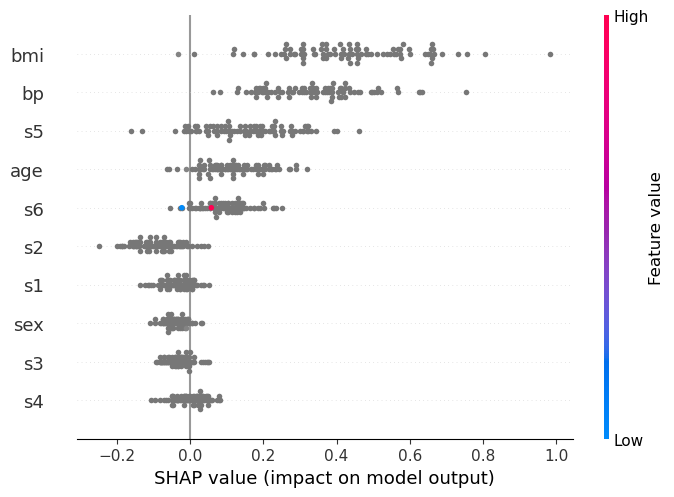

In [14]:
plt.figure()
shap.plots.beeswarm(shap_values_xm, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'xm'+'.png',bbox_inches='tight')
plt.show()

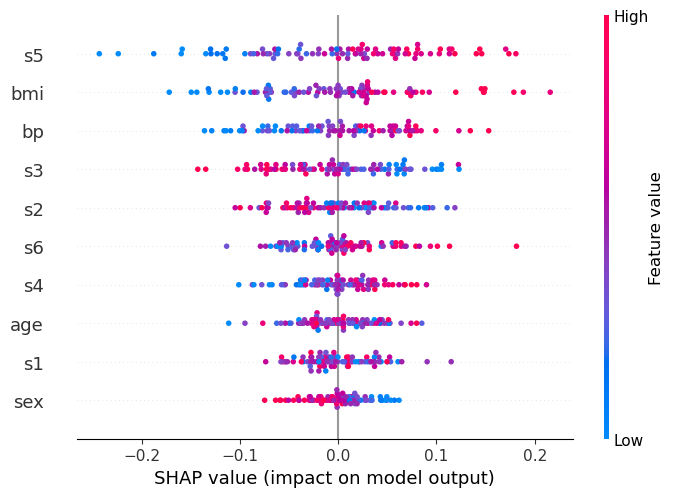

In [15]:
plt.figure()
shap.plots.beeswarm(shap_values_mi, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mi'+'.png',bbox_inches='tight')
plt.show()

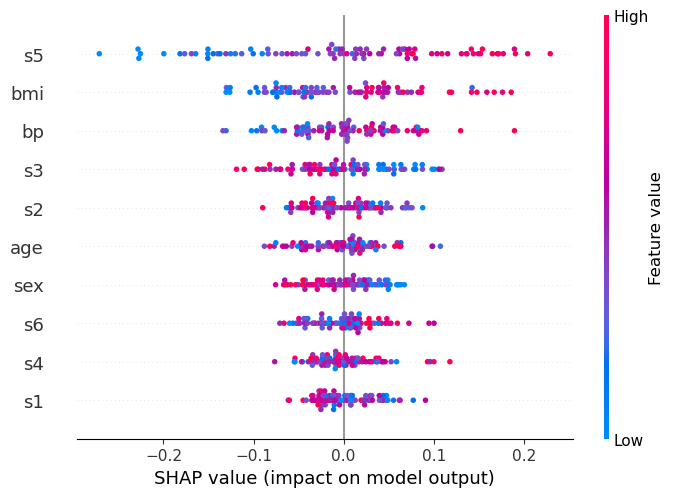

In [16]:
plt.figure()
shap.plots.beeswarm(shap_values_mice, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mice'+'.png',bbox_inches='tight')
plt.show()

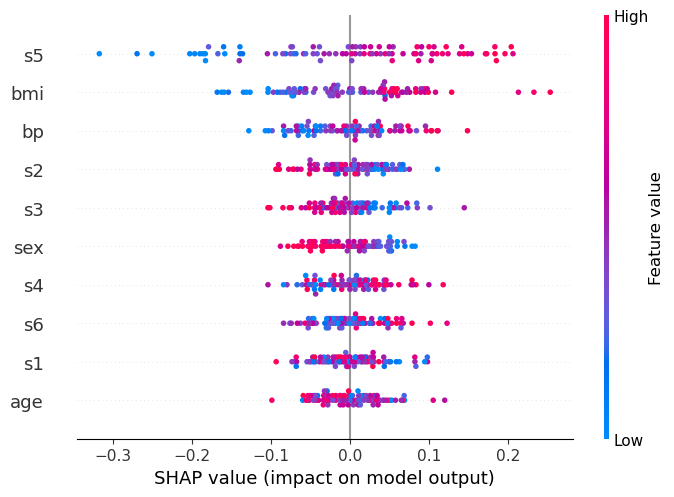

In [17]:
plt.figure()
shap.plots.beeswarm(shap_values_dimv, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'dimv'+'.png',bbox_inches='tight')
plt.show()

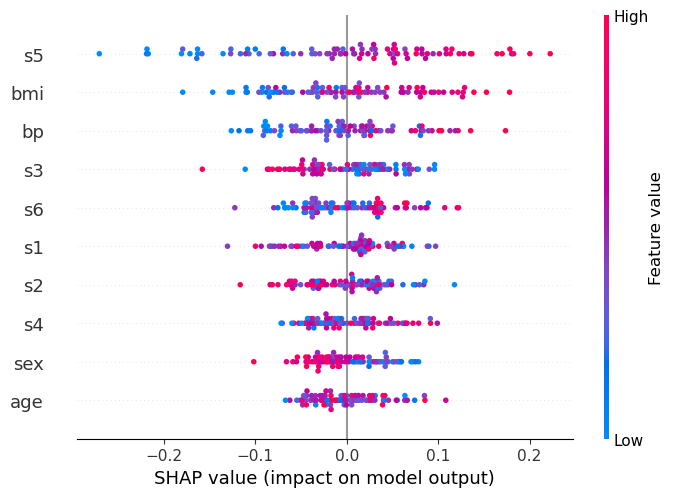

In [18]:
plt.figure()
shap.plots.beeswarm(shap_values_mf, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'mf'+'.png',bbox_inches='tight')
plt.show()

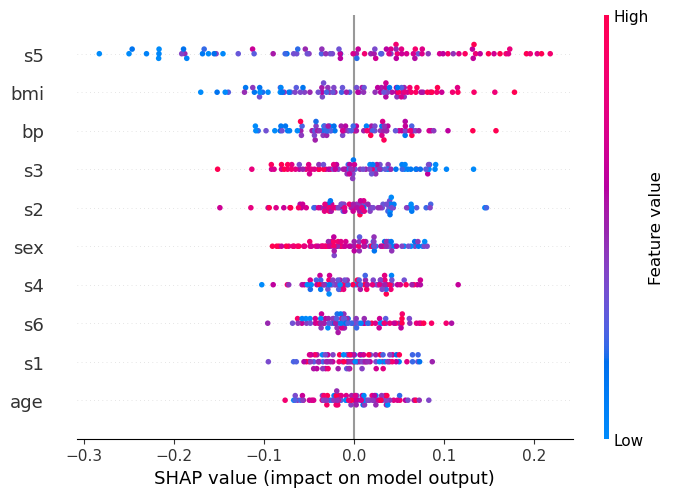

In [19]:
plt.figure()
shap.plots.beeswarm(shap_values_soft, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'soft'+'.png',bbox_inches='tight')
plt.show()

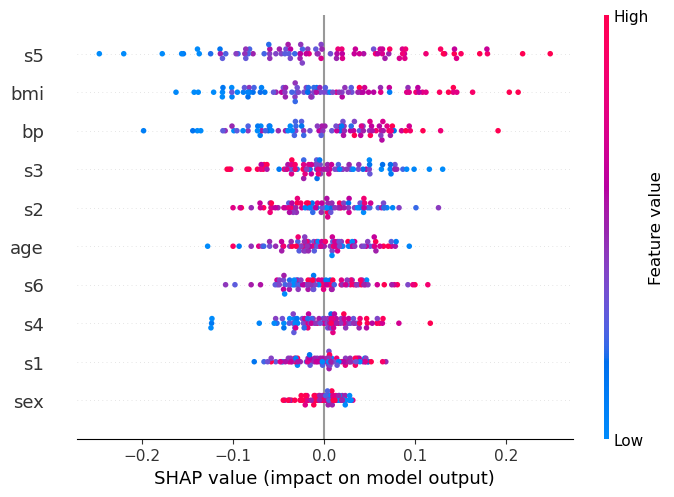

In [20]:
plt.figure()
shap.plots.beeswarm(shap_values_gain, max_display=10, show=False)
plt.savefig('results/'+ ouput_name+'beeswarm'+'gain'+'.png',bbox_inches='tight')
plt.show()

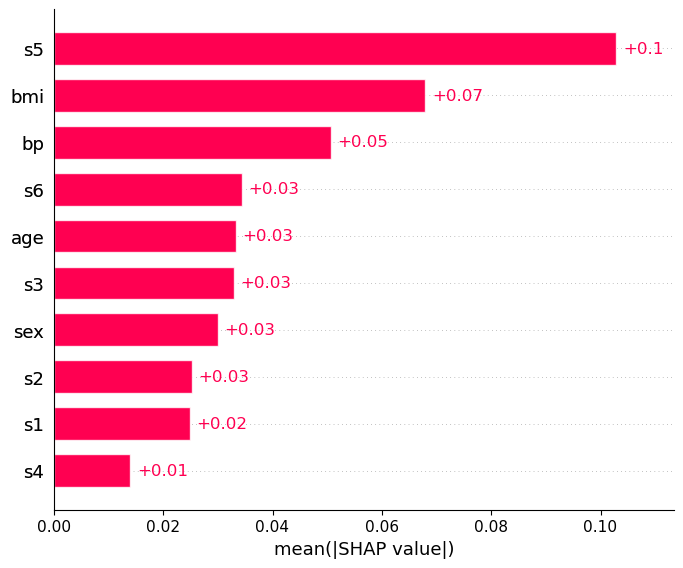

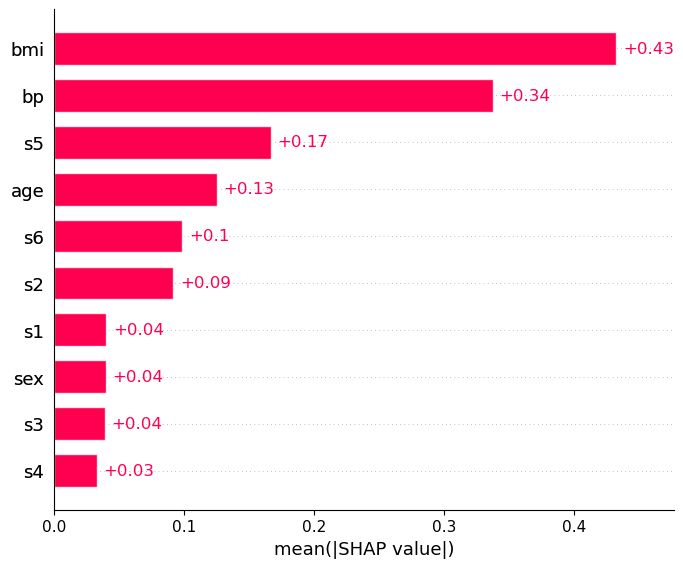

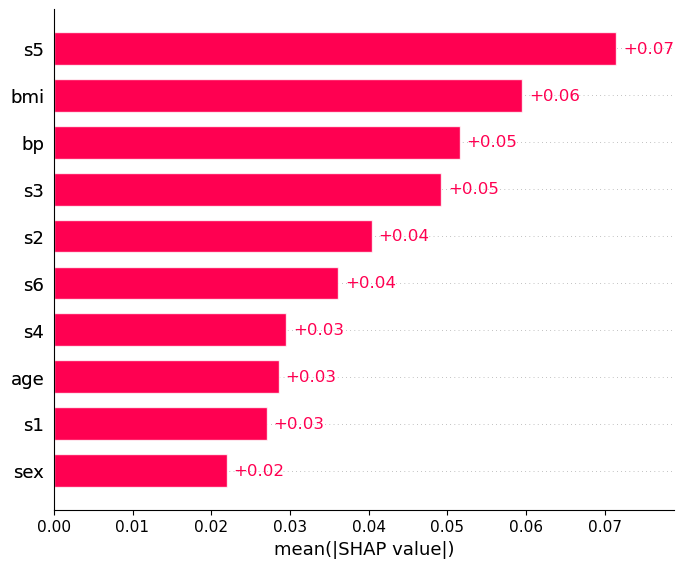

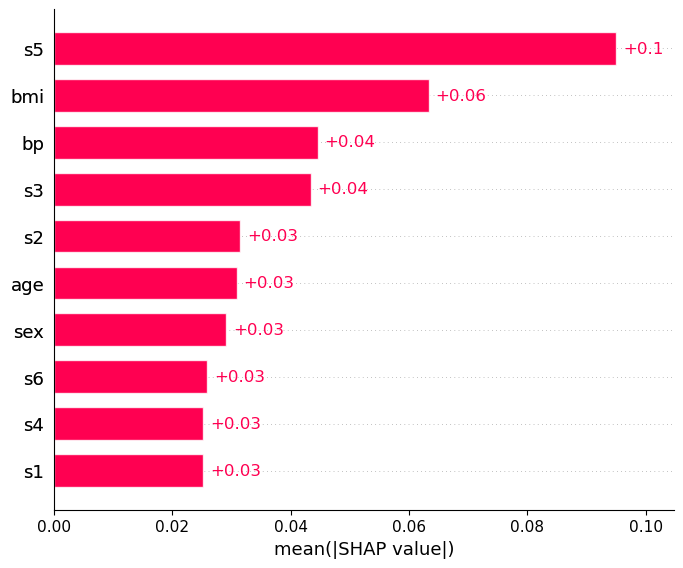

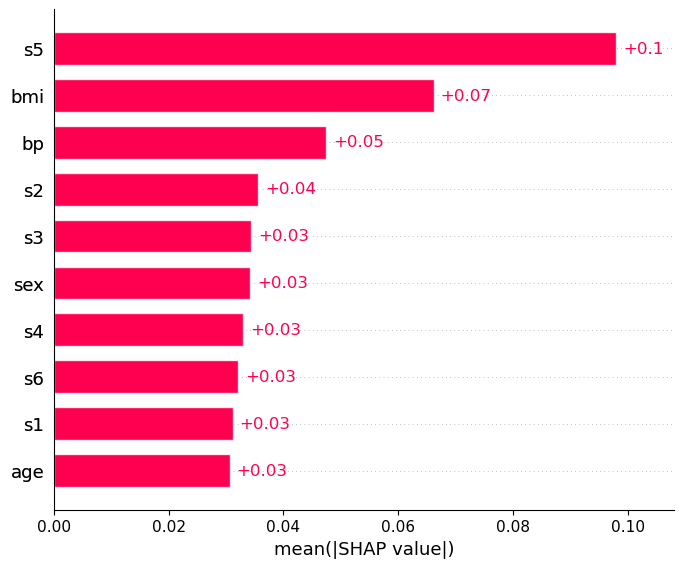

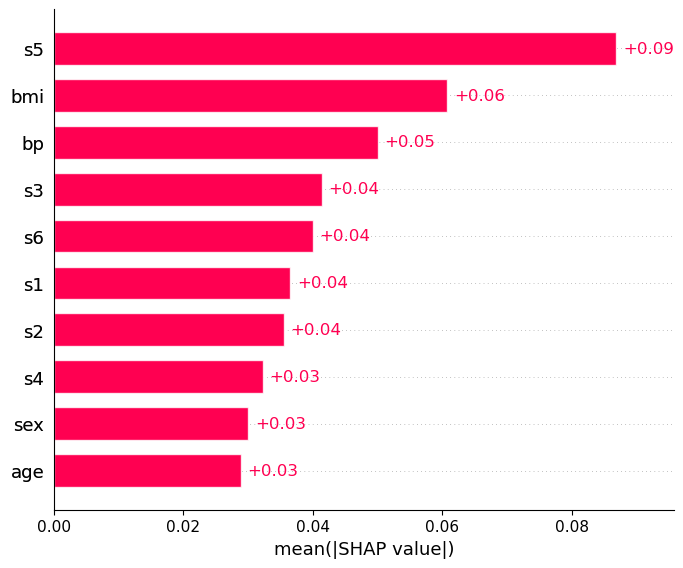

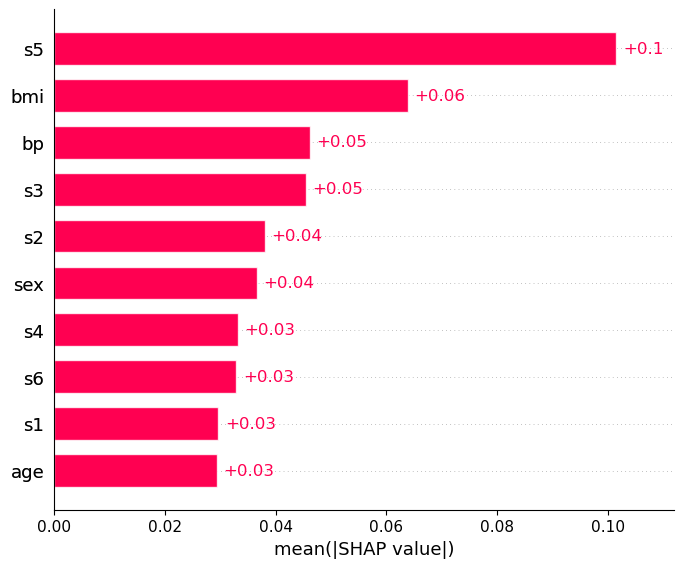

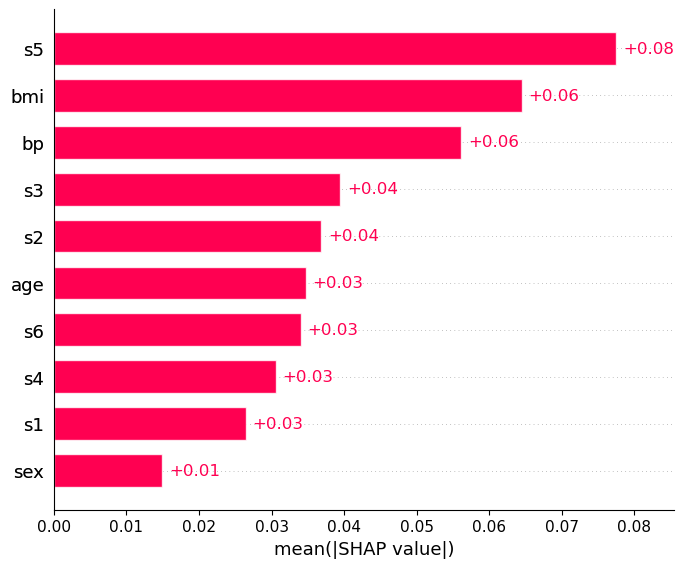

In [21]:
plt.figure()
shap.plots.bar(shap_values_ori, show=False)
plt.savefig('results/'+ouput_name+'bar_ori'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_xm, show=False)
plt.savefig('results/'+ouput_name+'bar_xm'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mi, show=False)
plt.savefig('results/'+ouput_name+'bar_mi'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mice, show=False)
plt.savefig('results/'+ouput_name+'bar_mice'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_dimv, show=False)
plt.savefig('results/'+ouput_name+'bar_dimv'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_mf, show=False)
plt.savefig('results/'+ouput_name+'bar_mf'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_soft, show=False)
plt.savefig('results/'+ouput_name+'bar_soft'+'.png',bbox_inches='tight')

plt.figure()
shap.plots.bar(shap_values_gain, show=False)
plt.savefig('results/'+ouput_name+'bar_gain'+'.png',bbox_inches='tight')


<Figure size 6400x4800 with 0 Axes>

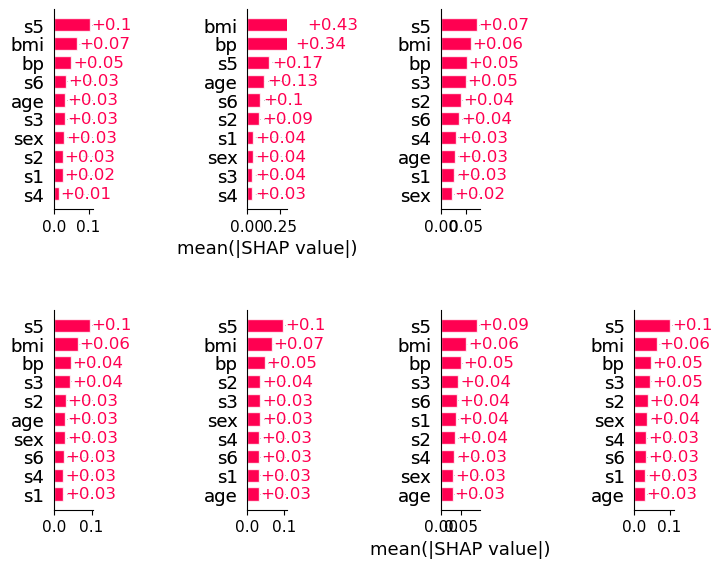

In [22]:
plt.figure(dpi=1000)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(200,100))
plt.sca(axes[0,0])
shap.plots.bar(shap_values_ori, show=False)
plt.sca(axes[0,1])
shap.plots.bar(shap_values_xm, show=False)
plt.sca(axes[0,2])
shap.plots.bar(shap_values_mi, show=False)
plt.sca(axes[1,0])
shap.plots.bar(shap_values_mice, show=False)
plt.sca(axes[1,1])
shap.plots.bar(shap_values_dimv, show=False)
plt.sca(axes[1,2])
shap.plots.bar(shap_values_mf, show=False)
plt.sca(axes[1,3])
shap.plots.bar(shap_values_soft, show=False)
axes[0,3].set_visible(False)
axes[0,0].set_xlabel('')
axes[0,1].set_xlim(0,0.3)
axes[1,1].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,1].set_ylabel('')
plt.subplots_adjust(wspace=3.9, hspace = .5) 
plt.savefig('results/'+ouput_name+'bar'+'.png',bbox_inches='tight')
plt.show()

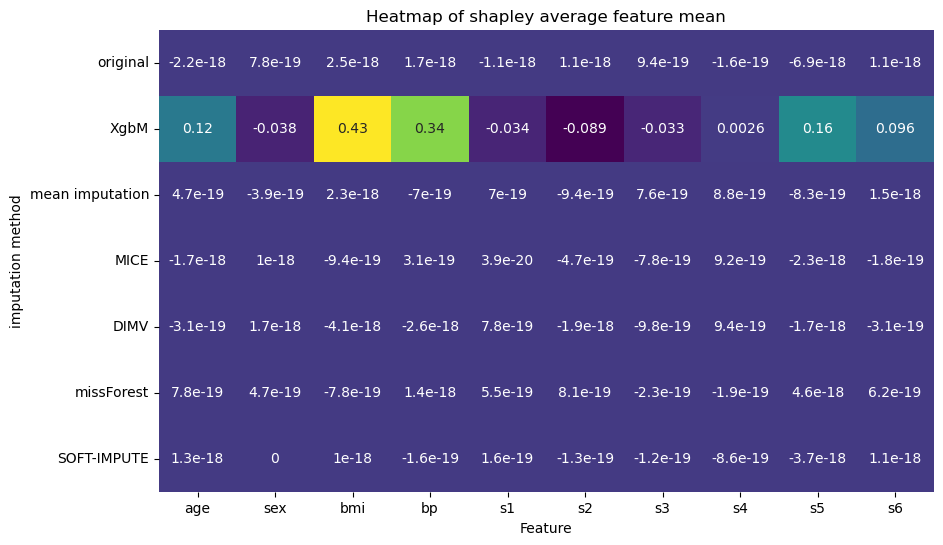

In [23]:
column_mean_ori = np.mean(shap_values_ori.values, axis=0)
column_mean_xm = np.mean(shap_values_xm.values, axis=0)
column_mean_mi = np.mean(shap_values_mi.values, axis=0)
column_mean_mice = np.mean(shap_values_mice.values, axis=0)
column_mean_dimv = np.mean(shap_values_dimv.values, axis=0)
column_mean_mf = np.mean(shap_values_mf.values, axis=0)
column_mean_soft = np.mean(shap_values_soft.values, axis=0)
heat_df = pd.DataFrame(np.vstack((column_mean_ori, column_mean_xm,column_mean_mi,column_mean_mice,
                                  column_mean_dimv,column_mean_mf,column_mean_soft)))
heat_df.columns = X_train.columns
heat_df.index = np.array(['original', 'XgbM', 'mean imputation', 'MICE','DIMV','missForest', 'SOFT-IMPUTE'])
plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, cmap='viridis', annot=True, cbar=False)
plt.title('Heatmap of shapley average feature mean')
plt.xlabel('Feature')
plt.ylabel('imputation method')
plt.savefig('results/'+ouput_name+'heatmap'+'.png',bbox_inches='tight')
plt.show()